# Bibliotecas

In [23]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm

# Base de dados 

In [ ]:
dados_originais = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [ ]:
H0_media = np.mean(dados_originais)
H0_media

In [ ]:
H0_dp = np.std(dados_originais)
H0_dp

In [ ]:
dados_novos = dados_originais * 1.03
dados_novos

In [ ]:
H1_media = np.mean(dados_novos)
H1_media

In [ ]:
H1_dp = np.std(dados_novos)
H1_dp

In [ ]:
H1_n = len(dados_novos)
H1_n

In [ ]:
alpha = 0.05

# Teste de hipótese Z 

Teste manual

In [ ]:
Z = (H1_media - H0_media) / (H1_dp / math.sqrt(H1_n))
Z

In [ ]:
norm.cdf(Z)

In [ ]:
Z = norm.cdf(Z)
Z

In [ ]:
p = 1 - Z
p

In [ ]:
if p < alpha:
    print('Hipótese nula rejeitada')
else:
    print('Hipótese alternativa rejeitada')

Teste com statsmodels

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
_, p = ztest(dados_originais, dados_novos, value = H1_media - H0_media, alternative = 'larger')
p

# Teste qui quadrado

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
tabela = np.array([[45, 5], [5, 45]])

In [ ]:
tabela.shape

In [ ]:
p =chi2_contingency(tabela)[1]
p

In [ ]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada')
else:
    print('Hipótese alternativa rejeitada')

# Seleção de atributos com testes de hipóteses - univariate SelectFdr

In [ ]:
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('ad.data', header = None)
dataset.head()

In [ ]:
dataset.shape

In [ ]:
X = dataset.iloc[:,0:1558].values
y = dataset.iloc[:,1558].values

In [ ]:
X, y

In [ ]:
np.unique(y, return_counts = True)

In [ ]:
naive1 = GaussianNB()
naive1.fit(X, y)
previsoes1 = naive1.predict(X)
accuracy_score(y, previsoes1)

In [ ]:
selecao = SelectFdr(chi2, alpha = 0.01)
X_novo = selecao.fit_transform(X, y)

In [ ]:
X.shape, X_novo.shape

In [ ]:
selecao.pvalues_

In [ ]:
np.sum(selecao.pvalues_ <= 0.01)

In [ ]:
colunas = selecao.get_support()
colunas

In [ ]:
indices = np.where(colunas == True)
indices

In [ ]:
naive2 = GaussianNB()
naive2.fit(X_novo, y)
previsoes2 = naive2.predict(X_novo)
accuracy_score(y, previsoes2)

# ANOVA

In [ ]:
grupo_a = np.array([165, 152, 143, 140, 155])
grupo_b = np.array([130, 169, 164, 143, 154])
grupo_c = np.array([163, 158, 154, 149, 156])

In [ ]:
from scipy.stats import f

In [ ]:
f.ppf(1 - 0.05, dfn = 2, dfd = 12)

In [ ]:
from scipy.stats import f_oneway

In [ ]:
_, p = f_oneway(grupo_a, grupo_b, grupo_c)
p

In [ ]:
alpha = 0.05
if p <= alpha:
    print('hipótese nula rejeitada')
else:
    print('hipótese alternativa rejeitada')

## Teste de Tukey

In [ ]:
dados = {'valores': [165, 1522, 143, 140, 155, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156], 'grupos': ['A','A','A','A','A','B','B','B','B','B','C','C','C','C','C']}

In [ ]:
dados_pd = pd.DataFrame(dados)
dados_pd

In [ ]:
from statsmodels.stats.multicomp import MultiComparison

In [ ]:
compara_grupos = MultiComparison(dados_pd['valores'], dados_pd['grupos'])

In [ ]:
teste = compara_grupos.tukeyhsd()
print(teste)

In [ ]:
teste.plot_simultaneous();

## Seleção de atributos com ANOVA

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
selecao = SelectFdr(f_classif, alpha = 0.01)
X_novo_2 = selecao.fit_transform(X, y)

In [ ]:
X.shape, X_novo.shape, X_novo_2.shape

In [ ]:
selecao.pvalues_

In [ ]:
np.sum(selecao.pvalues_ < 0.01)

In [ ]:
naive3 = GaussianNB()
naive3.fit(X_novo_2, y)
previsoes3 = naive3.predict(X_novo_2)
accuracy_score(y, previsoes3)

## Resultados dos algoritmos de machine learning 

In [24]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
dataset = pd.read_csv('credit_data.csv')
dataset.dropna(inplace = True)
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [25]:
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:,4].values

In [26]:
min(X[0]), max(X[0])

(59.0170150669292, 66155.9250950813)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
min(X[0]), max(X[0])

(1.2019070702053862, 1.4538977547824534)

In [29]:
resultados_nb = []
resultados_lr = []
resultados_rf = []

for i in range(30):
    kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
    
    nb = GaussianNB()
    scores = cross_val_score(nb, X, y, cv = kfold)
    resultados_nb.append(scores.mean())
    
    lr = LogisticRegression()
    scores = cross_val_score(lr, X, y, cv = kfold)
    resultados_lr.append(scores.mean())
    
    rf = RandomForestClassifier()
    scores = cross_val_score(rf, X, y, cv = kfold)
    resultados_rf.append(scores.mean())
    
resultados_nb = np.array(resultados_nb)
resultados_lr = np.array(resultados_lr)
resultados_rf = np.array(resultados_rf)

In [31]:
resultados_nb.mean(), resultados_lr.mean(), resultados_rf.mean()

(0.9249859296482411, 0.9457008375209381, 0.9867298994974874)

## Teste de hipótese de Shapiro-Wilk

In [32]:
alpha = 0.05

In [33]:
from scipy.stats import shapiro
shapiro(resultados_nb), shapiro(resultados_lr), shapiro(resultados_rf)

(ShapiroResult(statistic=0.9646664261817932, pvalue=0.40516602993011475),
 ShapiroResult(statistic=0.9463125467300415, pvalue=0.13457602262496948),
 ShapiroResult(statistic=0.9825697541236877, pvalue=0.8889768719673157))

<Axes: ylabel='Count'>

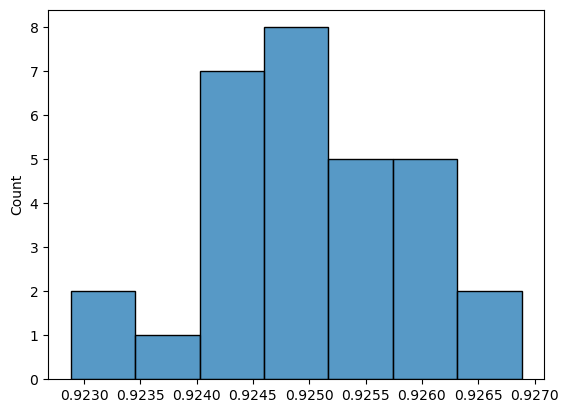

In [34]:
import seaborn as sns
sns.histplot(resultados_nb)

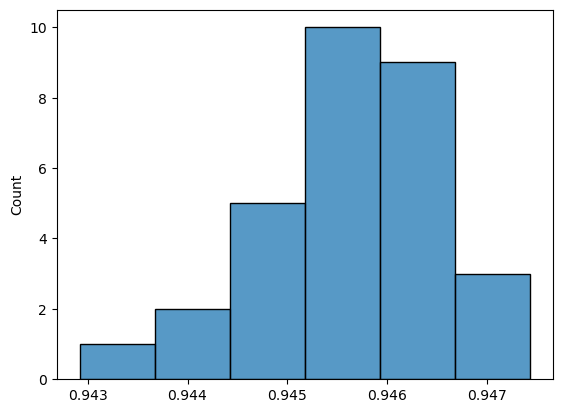

In [35]:
sns.histplot(resultados_lr);

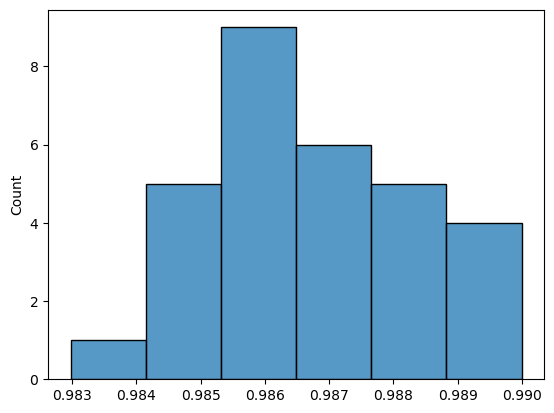

In [36]:
sns.histplot(resultados_rf);

## Teste de hipótese de D'Agostinho K^2

In [37]:
from scipy.stats import normaltest
normaltest(resultados_nb), normaltest(resultados_lr), normaltest(resultados_rf)

(NormaltestResult(statistic=0.8391668731677201, pvalue=0.6573205784978502),
 NormaltestResult(statistic=4.079254883823804, pvalue=0.1300771631514313),
 NormaltestResult(statistic=0.09069868203358666, pvalue=0.9556635710285103))

## Teste de hipótese de Anderson-Darling

In [38]:
from scipy.stats import anderson
anderson(resultados_nb).statistic, anderson(resultados_lr).statistic, anderson(resultados_rf).statistic 

(0.5456346672421084, 0.6048933015735933, 0.1997342054487241)

## Testes não paramétricos

## Teste de Wilcoxon Signed-Rank

In [39]:
alpha = 0.05

In [40]:
from scipy.stats import wilcoxon
_, p =wilcoxon(resultados_nb, resultados_lr)
p

1.862645149230957e-09

In [41]:
_, p =wilcoxon(resultados_nb, resultados_rf)
p

1.862645149230957e-09

In [42]:
_, p =wilcoxon(resultados_lr, resultados_rf)
p

1.862645149230957e-09

## Teste de Friedman

In [43]:
from scipy.stats import friedmanchisquare

In [45]:
_, p = friedmanchisquare(resultados_nb, resultados_lr, resultados_rf)
p

9.357622968840163e-14

# Exercício

Aplicar o ANOVA e o teste de Turkey na base de dados.

In [65]:
from scipy.stats import f_oneway

In [66]:
_, p = f_oneway(resultados_nb, resultados_lr, resultados_rf)
p

4.4278328114549097e-116

In [67]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada. Dados são diferentes')
else:
    print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada. Dados são diferentes


In [69]:
algoritmos = []
for i in range(3):
    for j in range(30):
        if i == 0:
            algoritmo = 'naive'
        if i == 1:
            algoritmo = 'logistic'
        if i == 2:
            algoritmo = 'forest'
        
        algoritmos.append(algoritmo)

print(algoritmos)

['naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'naive', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'logistic', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest']


In [72]:
np.unique(algoritmos, return_counts = True)

(array(['forest', 'logistic', 'naive'], dtype='<U8'),
 array([30, 30, 30], dtype=int64))

In [77]:
resultado_algoritmos = {'accuracy': np.concatenate([resultados_nb, resultados_lr, resultados_rf]), 'algoritmos': algoritmos}
resultado

In [79]:
resultados_df = pd.DataFrame(resultado_algoritmos)
resultados_df

,accuracy,algoritmos
0,0.924862,naive
1,0.924917,naive
2,0.924387,naive
3,0.922882,naive
4,0.924872,naive
...,...,...
85,0.987985,forest
86,0.984475,forest
87,0.985480,forest
88,0.989995,forest


In [82]:
from statsmodels.stats.multicomp import MultiComparison

In [84]:
compara_grupos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmos'])

In [85]:
teste = compara_grupos.tukeyhsd()
print(teste)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
  forest logistic   -0.041   0.0 -0.0418 -0.0403   True
  forest    naive  -0.0617   0.0 -0.0625  -0.061   True
logistic    naive  -0.0207   0.0 -0.0215   -0.02   True
-------------------------------------------------------


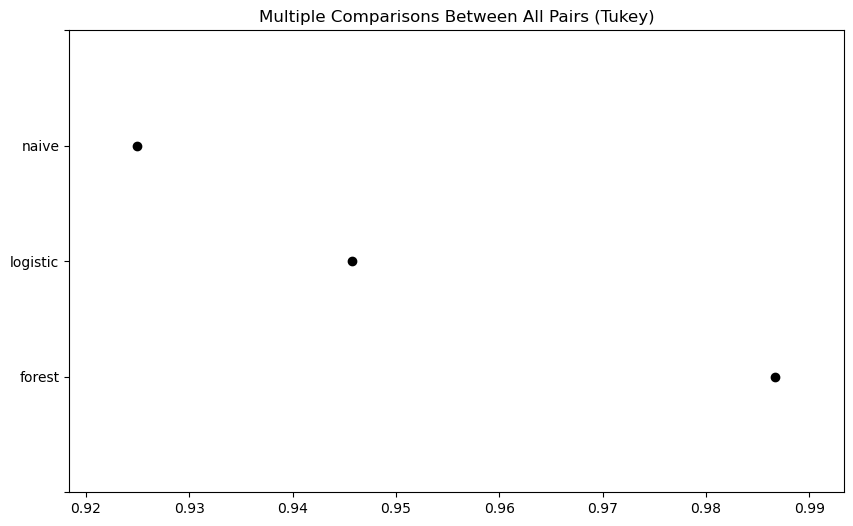

In [86]:
teste.plot_simultaneous();

## Teste de Nemenyi

In [88]:
resultados = {'naive': resultados_nb, 'logistic': resultados_lr, 'forest': resultados_rf}
resultados_df = pd.DataFrame(resultados)
resultados_df

,naive,logistic,forest
0,0.924862,0.946427,0.984970
1,0.924917,0.946402,0.987485
2,0.924387,0.946417,0.984477
3,0.922882,0.944910,0.986470
4,0.924872,0.945915,0.989487
5,0.925889,0.942917,0.986480
6,0.924384,0.944912,0.987980
7,0.924889,0.946902,0.986480
8,0.924872,0.945415,0.987975
9,0.923889,0.943927,0.986982


In [89]:
resultados_df.to_excel('resultados_excel.xlsx', sheet_name = 'resultados')

## Dados normais

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
dataset = pd.read_csv('trip_d1_d2.csv', sep = ';')
dataset.head()

,D1,D2
0,0.7928,0.7983
1,0.7926,0.7983
2,0.7925,0.7982
3,0.7928,0.7982
4,0.7928,0.7982


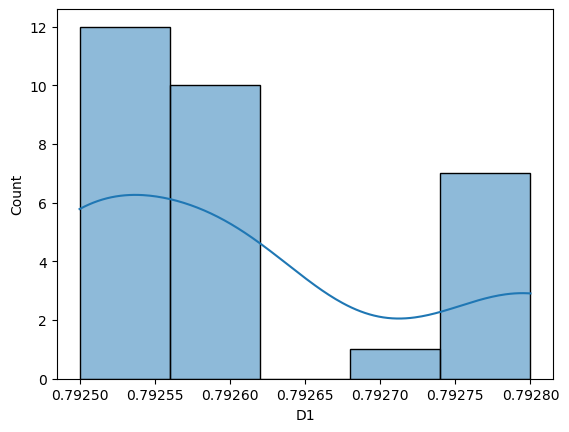

In [23]:
sns.histplot(dataset['D1'], kde = True, bins = 5);

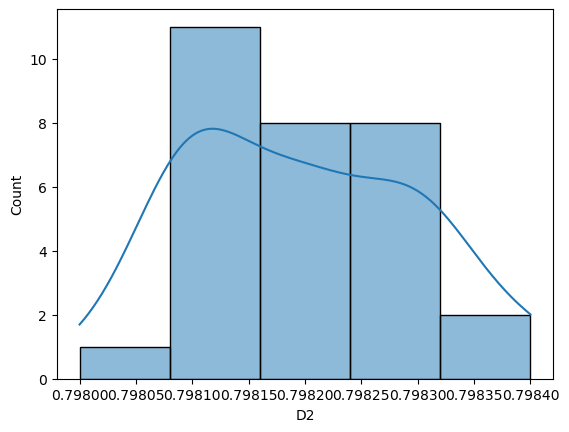

In [24]:
sns.histplot(dataset['D2'], kde = True, bins = 5);

In [25]:
from scipy.stats import shapiro
shapiro(dataset['D1']),shapiro(dataset['D2'])

(ShapiroResult(statistic=0.7709192037582397, pvalue=2.0211115042911842e-05),
 ShapiroResult(statistic=0.88901686668396, pvalue=0.004572464618831873))

In [27]:
from scipy.stats import wilcoxon
_, p = wilcoxon(dataset['D1'], dataset['D2'])
p

1.862645149230957e-09